<a href="https://colab.research.google.com/github/Manaswini123456/KAVACH_ML/blob/main/SMS_SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [6]:
pip install chardet

In [7]:
import chardet

with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

df = pd.read_csv('spam.csv', encoding=encoding)


In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1940,ham,Dude avatar 3d was imp. At one point i thought...,NaN,NaN,NaN
2033,ham,IM GONNA MISS U SO MUCH,NaN,NaN,NaN
3474,ham,"Night has ended for another day, morning has c...",NaN,NaN,NaN
451,ham,Thanks for this hope you had a good day today,NaN,NaN,NaN
4289,ham,"For you information, IKEA is spelled with all ...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample(5)

,v1,v2
5459,ham,If you hear a loud scream in about &lt;#&gt; m...
1225,ham,"sir, you will receive the account no another 1..."
4328,ham,1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cance...
1863,ham,I'll let you know when it kicks in
5491,ham,U studying in sch or going home? Anyway i'll b...


In [13]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4797,ham,Just come home. I don't want u to be miserable
3654,ham,Senthil group company Apnt 5pm.
5102,spam,This msg is for your mobile content order It h...
3359,ham,Please attend the phone:)
2573,spam,Congrats 2 mobile 3G Videophones R yours. call...


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# check for duplicate values
df.duplicated().sum()

403

In [19]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

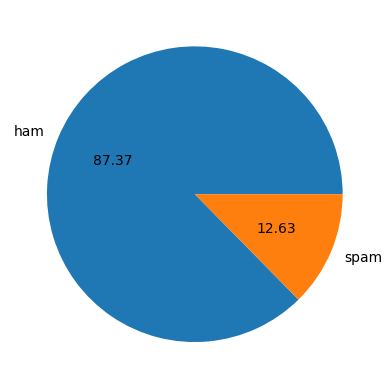

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
import nltk

In [26]:
!pip install nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
df['num_characters'] = df['text'].apply(len)

In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

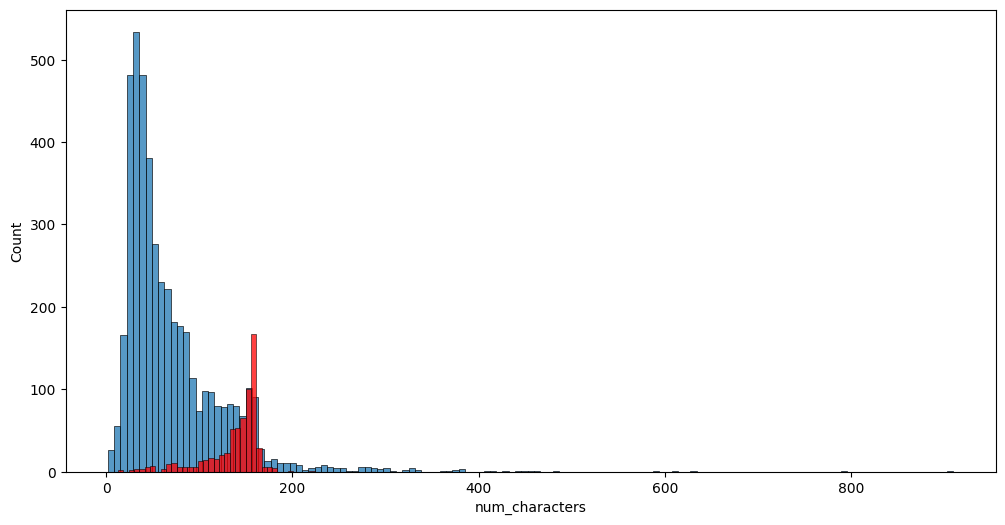

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

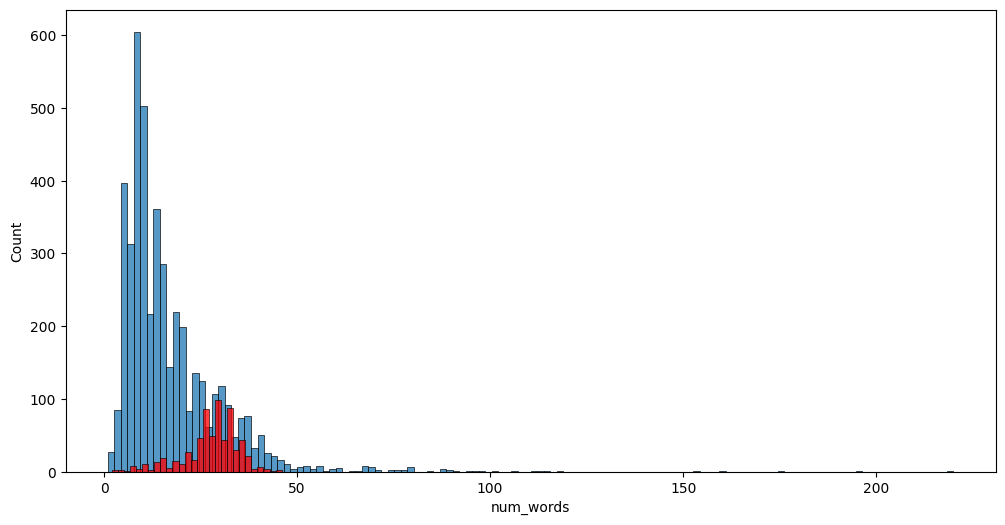

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

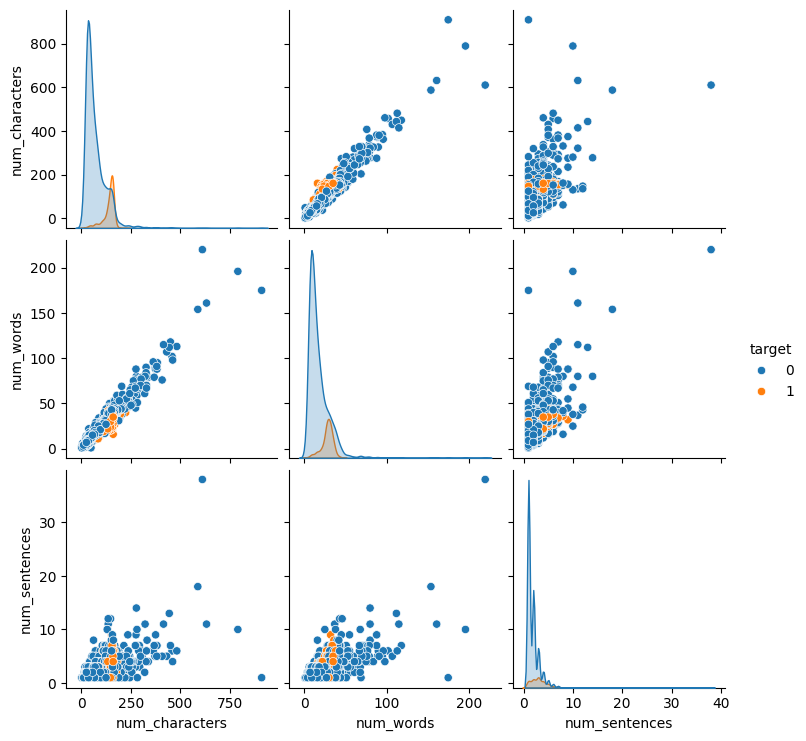

In [39]:
sns.pairplot(df,hue='target')

In [41]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [43]:
pip install nltk


In [44]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [45]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

def transform_text(text):
    stop_words = set(stopwords.words('english'))
    y = []

    for word in text.split():
        if word.lower() not in stop_words and word not in string.punctuation:
            y.append(word)

    return " ".join(y)

# Example usage
transformed_text = transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)


I'm gonna home soon want talk stuff anymore tonight, k? I've cried enough today.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [48]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah think goes usf, lives around though"


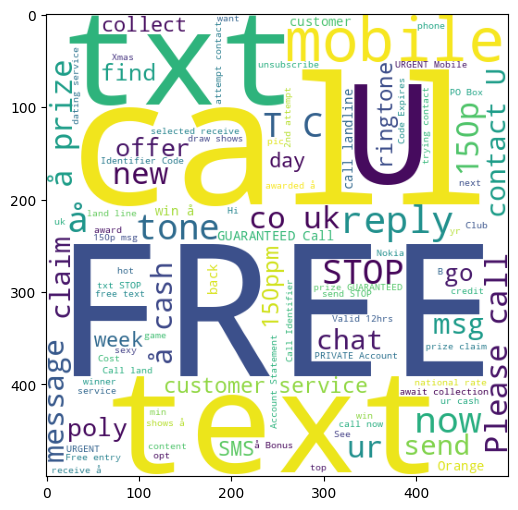

In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

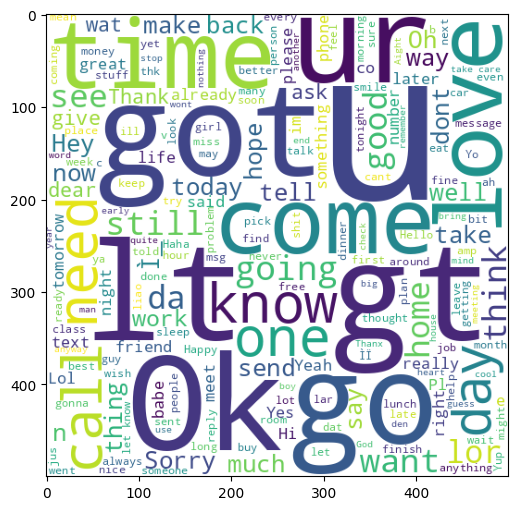

In [50]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah think goes usf, lives around though"


In [52]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

11075

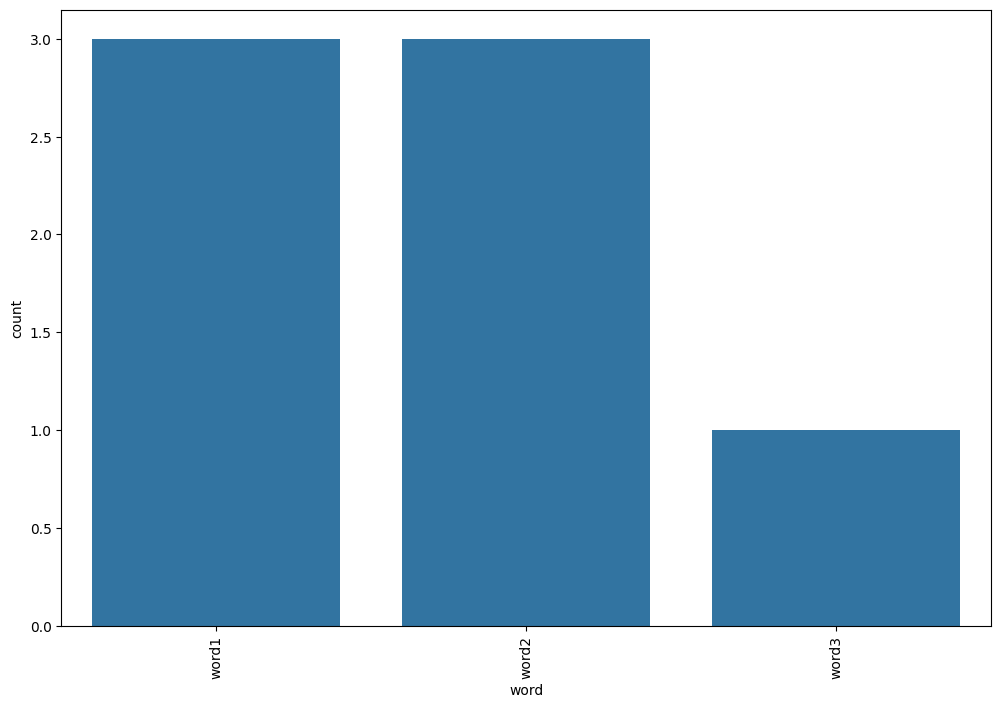

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Assuming spam_corpus is a list of words
spam_corpus = ["word1", "word2", "word1", "word3", "word2", "word2", "word1"]  # Replace this with your actual spam_corpus

# Generate the most common words
most_common_words = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the most common words
df_common_words = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='word', y='count', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()


In [55]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

38351

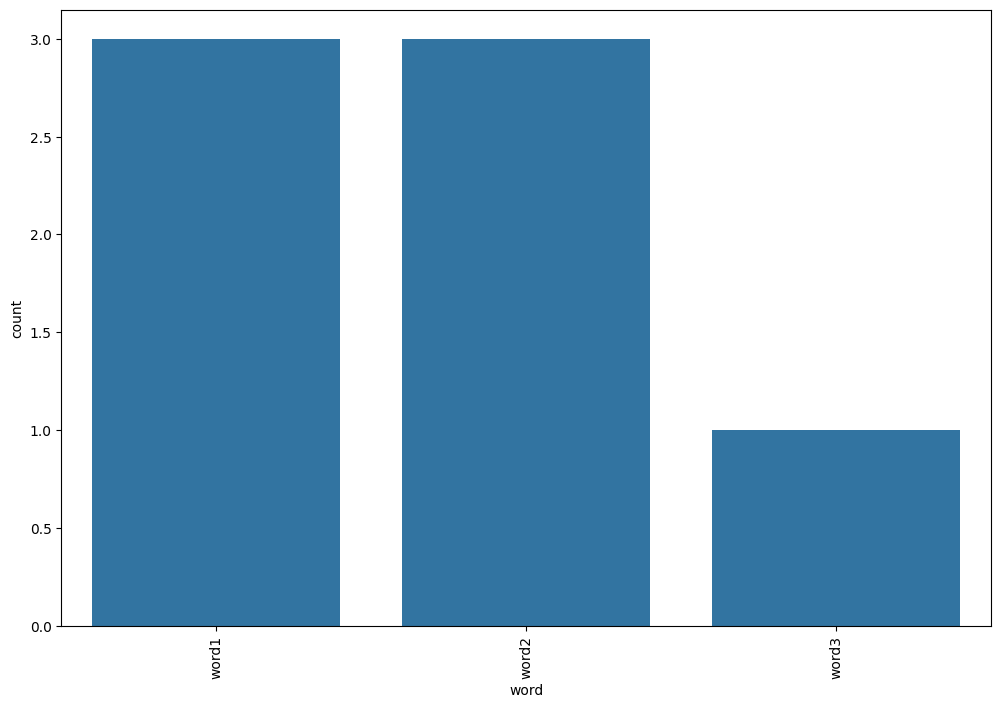

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Assuming ham_corpus is a list of words
ham_corpus = ["word1", "word2", "word1", "word3", "word2", "word2", "word1"]  # Replace this with your actual ham_corpus

# Generate the most common words
most_common_words = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the most common words
df_common_words = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='word', y='count', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()


In [59]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah think goes usf, lives around though"


In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
X.shape

(5169, 3000)

In [62]:
y = df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8965183752417795
[[808  88]
 [ 19 119]]
0.5748792270531401


In [64]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9796905222437138
[[896   0]
 [ 21 117]]
1.0


In [65]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9874274661508704
[[896   0]
 [ 13 125]]
1.0


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [68]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [69]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9796905222437138, 0.975609756097561)

In [70]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9796905222437138
Precision -  1.0
For  DT
Accuracy -  0.9410058027079303
Precision -  0.8737864077669902
For  LR
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For  RF
Accuracy -  0.9777562862669246
Precision -  1.0
For  AdaBoost
Accuracy -  0.9680851063829787
Precision -  0.9646017699115044
For  BgC
Accuracy -  0.960348162475822
Precision -  0.875968992248062
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  GBDT
Accuracy -  0.9458413926499033
Precision -  0.9019607843137255
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9508196721311475


In [71]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [72]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
2,NB,0.979691,1.000000
5,RF,0.977756,1.000000
0,SVC,0.979691,0.975610
8,ETC,0.977756,0.975207
6,AdaBoost,0.968085,0.964602
4,LR,0.957447,0.951923
10,xgb,0.972921,0.950820
9,GBDT,0.945841,0.901961
7,BgC,0.960348,0.875969


In [73]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [74]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,NB,Accuracy,0.979691
2,RF,Accuracy,0.977756
3,SVC,Accuracy,0.979691
4,ETC,Accuracy,0.977756
5,AdaBoost,Accuracy,0.968085
6,LR,Accuracy,0.957447
7,xgb,Accuracy,0.972921
8,GBDT,Accuracy,0.945841
9,BgC,Accuracy,0.960348


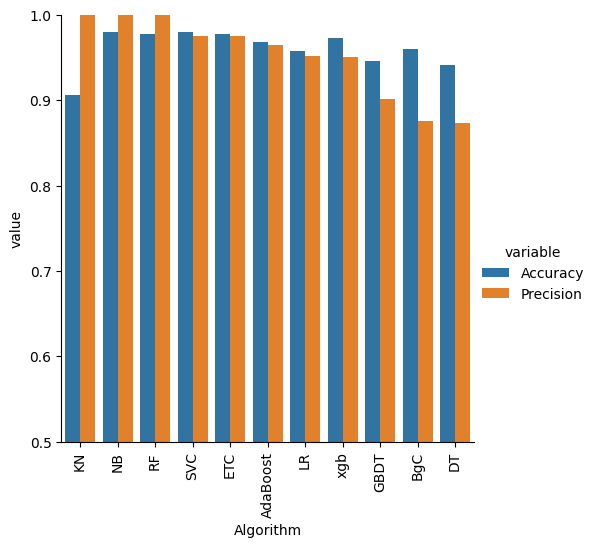

In [75]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [76]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,NB,0.979691,1.000000,0.979691,1.000000,0.979691,1.000000,0.979691,1.000000
2,RF,0.977756,1.000000,0.977756,1.000000,0.977756,1.000000,0.977756,1.000000
3,SVC,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610
4,ETC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
5,AdaBoost,0.968085,0.964602,0.968085,0.964602,0.968085,0.964602,0.968085,0.964602
6,LR,0.957447,0.951923,0.957447,0.951923,0.957447,0.951923,0.957447,0.951923
7,xgb,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820
8,GBDT,0.945841,0.901961,0.945841,0.901961,0.945841,0.901961,0.945841,0.901961
9,BgC,0.960348,0.875969,0.960348,0.875969,0.960348,0.875969,0.960348,0.875969


In [77]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [78]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9841269841269841


In [83]:
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load example dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators and final estimator
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]
final_estimator = LogisticRegression()

# Initialize StackingClassifier with parallel processing
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, n_jobs=-1)

# Use a subset of data for faster testing
X_train_subset = X_train.sample(frac=0.1, random_state=42)
y_train_subset = y_train.sample(frac=0.1, random_state=42)

# Fit the model
clf.fit(X_train_subset, y_train_subset)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))



Accuracy 0.9333333333333333
